In [72]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

## Load data

In [73]:
df = pd.read_csv("./data/PLACES__County_Data__GIS_Friendly_Format___2023_release_20231107_filtered.csv")

filtered_col_names = df.columns

wo_fl = df[df["StateDesc"] != "Florida"]
clean_df = wo_fl[wo_fl["StateDesc"] != "District of Columbia"]

extra_data = pd.read_csv('./data/MainSheet-Table 1.csv')

In [74]:
# Function to calculate weighted average
def weighted_average(group):
    weights = group['TotalPopulation']
    exclude_cols = ['Unnamed: 0', 'StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TotalPopulation', 'Geolocation']
    weighted_values = group.drop(exclude_cols, axis=1).multiply(weights, axis=0)
    weighted_sum = weighted_values.sum()
    total_weights = weights.sum()
    return weighted_sum / total_weights

# Grouping by 'StateDesc' and calculating weighted averages for other columns
state_df = clean_df.groupby('StateDesc').apply(weighted_average).reset_index()

merged_data = pd.merge(state_df, extra_data, on='StateDesc')
merged_data.to_csv("./data/merged_and_aggregated.csv", index=False)

## Overview
Data for overview table

In [75]:
california = state_df[state_df["StateDesc"] == "California"]['OBESITY_AdjPrev'].iloc[0]
print(f"California Rate: {california}")

sd_rate = clean_df[clean_df["CountyName"] == "San Diego"]['OBESITY_AdjPrev'].iloc[0]
print(f"San Diego: {sd_rate}")


sorted_state = state_df.sort_values(by='OBESITY_AdjPrev', ascending=True)
lowest_state_name_state_name = sorted_state[["StateDesc", 'OBESITY_AdjPrev']].iloc[0, 0]
lowest_state_rate = sorted_state[["StateDesc", 'OBESITY_AdjPrev']].iloc[0, 1]

print(f"Lowest state: {lowest_state_name}, {lowest_state_rate}")

highest_state_name = sorted_state[["StateDesc", 'OBESITY_AdjPrev']].iloc[48, 0]
highest_state_rate = sorted_state[["StateDesc", 'OBESITY_AdjPrev']].iloc[48, 1]

print(f"Highest state: {highest_state_name}, {highest_state_rate}")

sorted_county = clean_df.sort_values(by='OBESITY_AdjPrev', ascending=True)

lowest_county_state = sorted_county[["StateDesc", "CountyName", 'OBESITY_AdjPrev']].iloc[0, 0]
lowest_county_name = sorted_county[["CountyName", 'OBESITY_AdjPrev']].iloc[0, 0]
lowest_county_rate = sorted_county[["CountyName", 'OBESITY_AdjPrev']].iloc[0, 1]

print(f"Lowest county: {lowest_county_name}, {lowest_county_state}, {lowest_county_rate}")

highest_county_state = sorted_county[["StateDesc", "CountyName", 'OBESITY_AdjPrev']].iloc[sorted_county.shape[0] - 1, 0]
highest_county_name = sorted_county[["CountyName", 'OBESITY_AdjPrev']].iloc[sorted_county.shape[0] - 1, 0]
highest_county_rate = sorted_county[["CountyName", 'OBESITY_AdjPrev']].iloc[sorted_county.shape[0] - 1, 1]

print(f"Highest county: {highest_county_name}, {highest_county_state}, {highest_county_rate}")

weighted_mean = (clean_df['OBESITY_AdjPrev'] * clean_df['TotalPopulation']).sum() / clean_df['TotalPopulation'].sum()

print(f"Mean value: {weighted_mean}")

California Rate: 28.73673242836328
San Diego: 23.9
Lowest state: Hawaii, 25.1602398940587
Highest state: Mississippi, 40.67172705438878
Lowest county: Boulder, Colorado, 17.4
Highest county: Perry, Alabama, 52.5
Mean value: 33.55514657781391


## Obesity Distribution

/var/folders/2d/y_xyxzmd30xdgjk5kf8wqrxw0000gn/T/ipykernel_12206/2861906524.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=obesity_data, shade=True, ax=ax1)


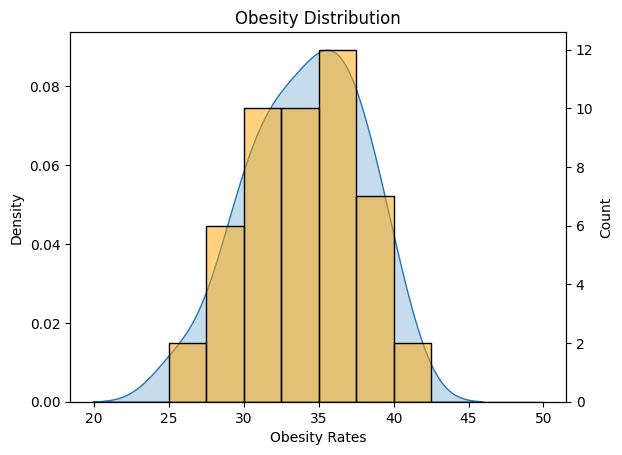

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming state_df['OBESITY_AdjPrev'] contains your data
obesity_data = state_df['OBESITY_AdjPrev']

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot KDE using Seaborn on the first axis
sns.kdeplot(data=obesity_data, shade=True, ax=ax1)
ax1.set_title('Obesity Distribution')
ax1.set_xlabel('Obesity Rates')
ax1.set_ylabel('Density')

# Create a second y-axis for the bar plot
ax2 = ax1.twinx()

# Plotting the bar plot on the second y-axis (same data as KDE plot)
sns.histplot(data=obesity_data, kde=False, color='orange', alpha=0.5, ax=ax2, binwidth=2.5, binrange=(20,50))  # Adjust color and alpha as needed
ax2.set_ylabel('Count')  # Set label for the second y-axis

# Show the plot
plt.show()


In [77]:
correlation_cols = []

exclude_cols = [
 'StateAbbr',
 'StateDesc',
 'CountyName',
 'CountyFIPS',
 'TotalPopulation',
 'Geolocation'
 ]

for col_name in merged_data.columns:
    if col_name not in exclude_cols:
        correlation_cols.append(col_name)

correlation_df = merged_data[correlation_cols]


correlations = correlation_df.corr()
correlations["OBESITY_AdjPrev"].to_csv("./data/2023_correlations.csv")

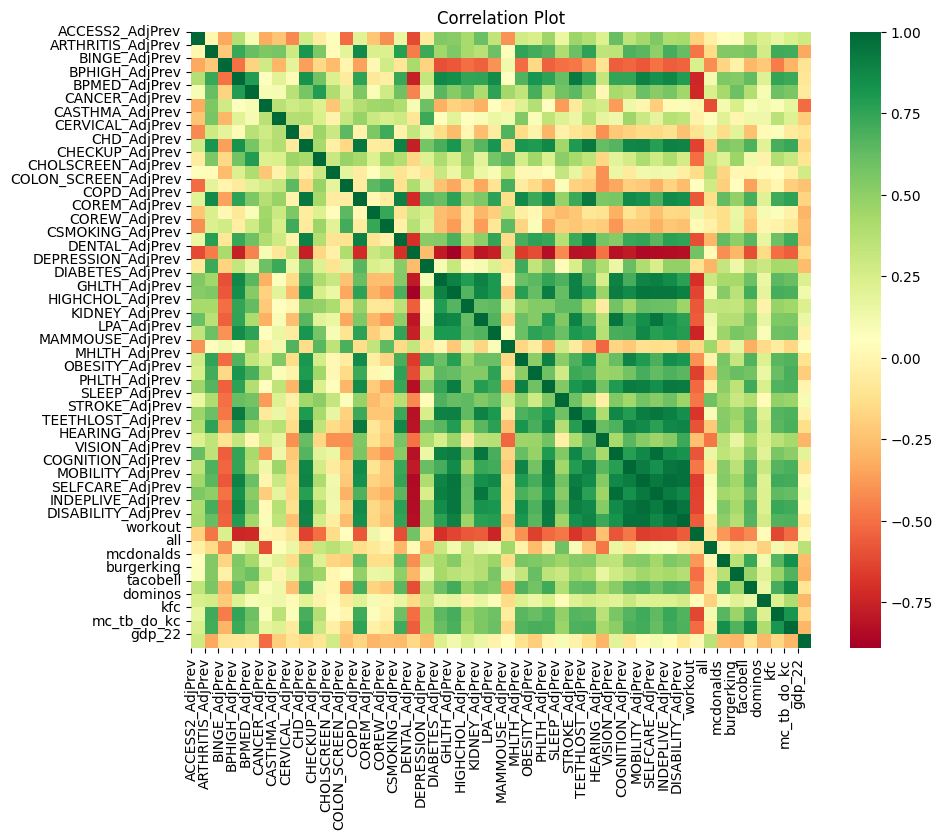

In [78]:
corr_matrix = correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='RdYlGn', annot=False, fmt=".2f")
plt.title('Correlation Plot')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()